In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
def fillna_by_mean_of_columns(df):
    for column in list(df.columns[df.isnull().sum() > 0]):
        mean_val = df[column].mean()
        df[column].fillna(mean_val, inplace=True)
    return df

In [3]:
df = pd.read_csv('home-credit-default-risk/application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


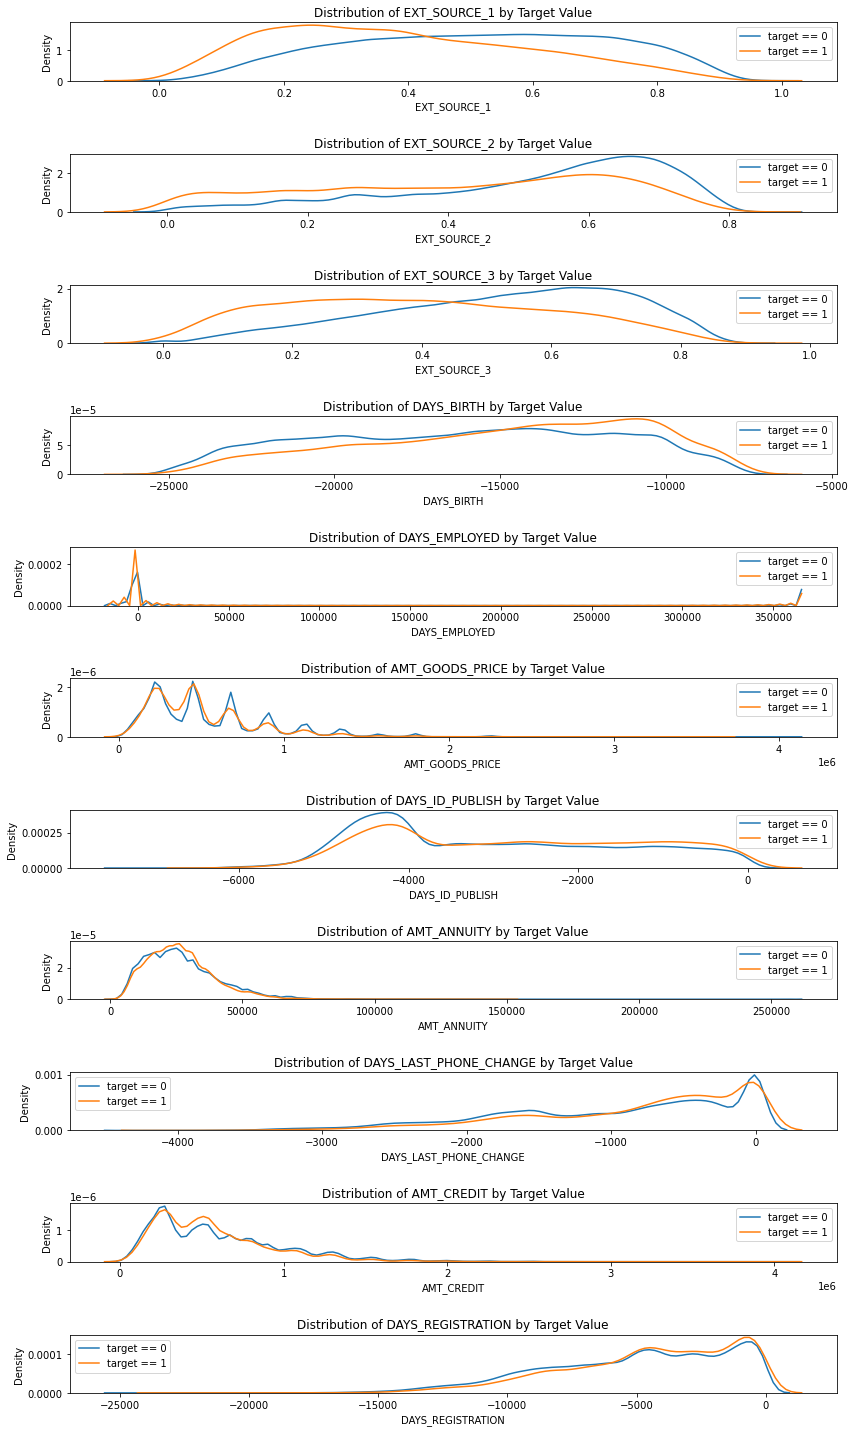

In [5]:
#检验所构造前原有特征对违约用户和非违约用户区分度
plt.figure(figsize = (12, 20))
# 构造新特性的迭代器
for i, feature in enumerate(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
        'DAYS_BIRTH', 'DAYS_EMPLOYED','AMT_GOODS_PRICE','DAYS_ID_PUBLISH',
        'AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','AMT_CREDIT','DAYS_REGISTRATION']):
    
    # 创建子图
    plt.subplot(11, 1, i + 1)
    # 按期还款用户的KDE图
    sns.kdeplot(df.loc[df['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['TARGET'] == 1, feature], label = 'target == 1')
    
    # 未按期还款用户的KDE图
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [6]:
df['CREDIT_TERM'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
df['ANNUITY_INCOME_PERCENT'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['DAYS_EMPLOYED_PERCENT'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
df['HAS_HOUSE_INFORMATION'] = df['COMMONAREA_MEDI'].apply(lambda x:1 if x>0 else 0)

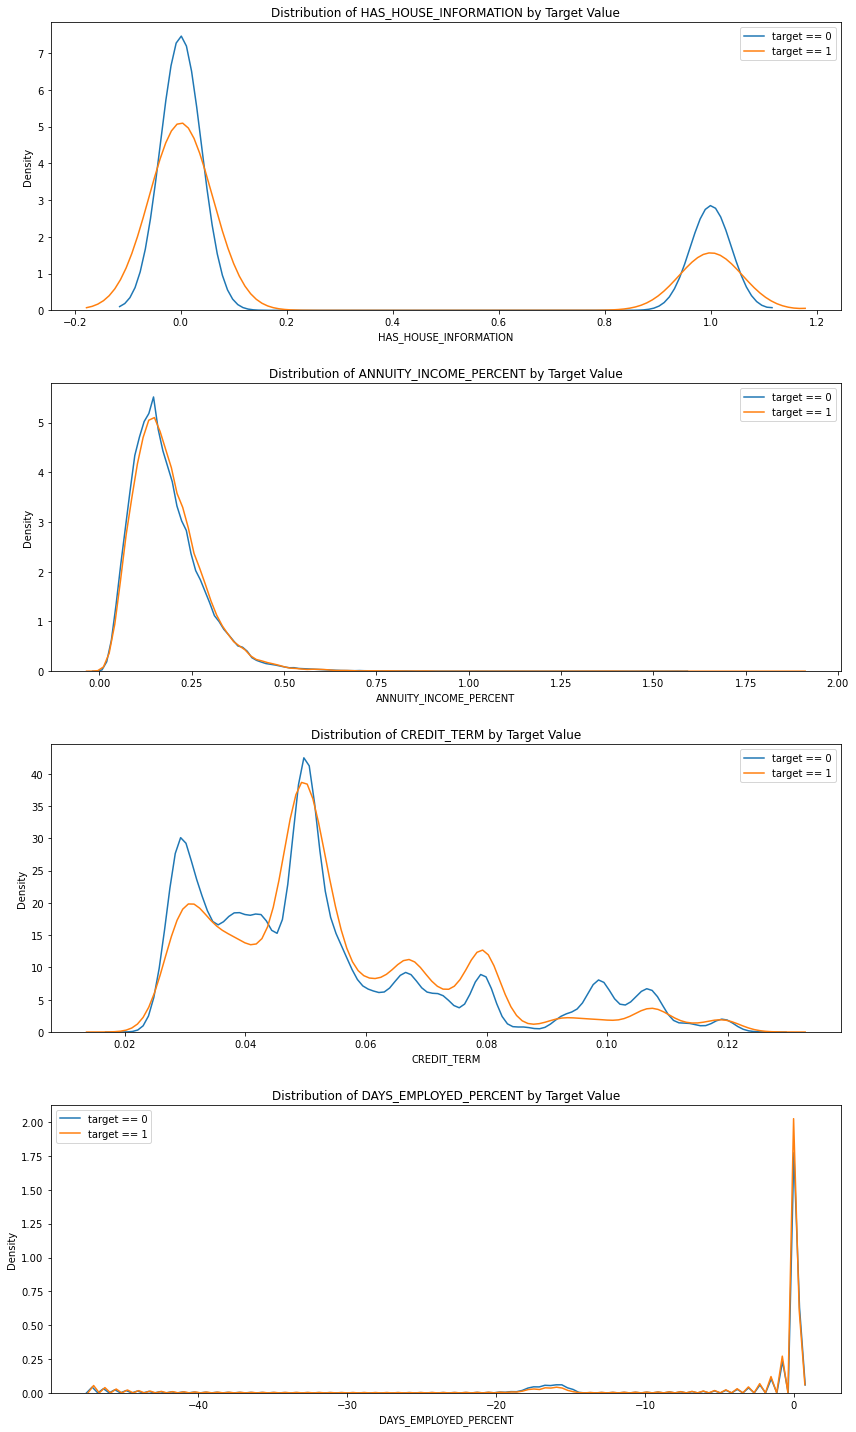

In [7]:
#检验所构造前4个新特征对违约用户和非违约用户区分度
plt.figure(figsize = (12, 20))
# 构造新特性的迭代器
for i, feature in enumerate(['HAS_HOUSE_INFORMATION', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # 创建子图
    plt.subplot(4, 1, i + 1)
    # 按期还款用户的KDE图
    sns.kdeplot(df.loc[df['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['TARGET'] == 1, feature], label = 'target == 1')
    
    # 未按期还款用户的KDE图
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [8]:
X = df[['CREDIT_TERM', 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
        'DAYS_BIRTH', 'DAYS_EMPLOYED','AMT_GOODS_PRICE','DAYS_ID_PUBLISH',
        'AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','AMT_CREDIT','DAYS_REGISTRATION',
        'ANNUITY_INCOME_PERCENT','DAYS_EMPLOYED_PERCENT','HAS_HOUSE_INFORMATION']]
y = df[['TARGET']]

In [9]:
X = fillna_by_mean_of_columns(X)
y = fillna_by_mean_of_columns(y)

X = X.replace(np.inf,0)

c:\users\alienware\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [10]:
from sklearn.model_selection import train_test_split

X_train = X
y_train = y

In [11]:
# Normalized the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [12]:
# Choose LogisticRegression with C = 0.0001 for estimating results.
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C = 0.0001)
lg.fit(X_train_scaled, y_train)

c:\users\alienware\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=0.0001)

In [13]:
df = pd.read_csv('home-credit-default-risk/application_test.csv')

df['CREDIT_TERM'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
df['ANNUITY_INCOME_PERCENT'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['DAYS_EMPLOYED_PERCENT'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
df['HAS_HOUSE_INFORMATION'] = df['COMMONAREA_MEDI'].apply(lambda x:1 if x>0 else 0)

X = df[['CREDIT_TERM', 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
        'DAYS_BIRTH', 'DAYS_EMPLOYED','AMT_GOODS_PRICE','DAYS_ID_PUBLISH',
        'AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','AMT_CREDIT','DAYS_REGISTRATION',
        'ANNUITY_INCOME_PERCENT','DAYS_EMPLOYED_PERCENT','HAS_HOUSE_INFORMATION']]

X = fillna_by_mean_of_columns(X)
X = X.replace(np.inf,0)

X_test_file_scaled = scaler.transform(X)

lg_predict = lg.predict_proba(X_test_file_scaled)

pred = pd.Series(lg_predict[:, -1], name='TARGET')
result = pd.concat([df['SK_ID_CURR'], pred], axis=1)
result.to_csv('result.csv',index=False)

c:\users\alienware\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
